In the 2nd example, we already generated the confusion matrices and stored them in `res/benchmarkdataset_res.mat`. So, firstly, we need to reload these confusion matrices. In this example, we only consider the results of 0.5s signal length.

In [2]:
import sys
sys.path.append('..')
from SSVEPAnalysisToolbox.utils.io import loaddata
data_file = 'res/benchmarkdataset_res.mat'
data = loaddata(data_file, 'mat')
confusion_matrix = data["confusion_matrix"]
method_ID = data["method_ID"]
tw_seq = data["tw_seq"]

import numpy as np
target_time = 0.5
signal_len_idx = int(np.where(np.array(tw_seq)==target_time)[0])

We also want to display the confusion matrix from low stimulus frequency to high stimulus frequency. Therefore, we also need the stimulus frequency information. Because such information can be found in dataset, we recreate the dataset and read the information. 

In [3]:
from SSVEPAnalysisToolbox.datasets import BenchmarkDataset
dataset = BenchmarkDataset(path = '2016_Tsinghua_SSVEP_database')
freqs = dataset.stim_info['freqs']
sort_idx = list(np.argsort(freqs))

In the 2nd example, we evaluate multiple methods' performance. This example only consider the 1st method, i.e., sCCA method. We can get the corresponding confusion matrix and plot it.

Text(0.5, 0, 'Predicted Label')

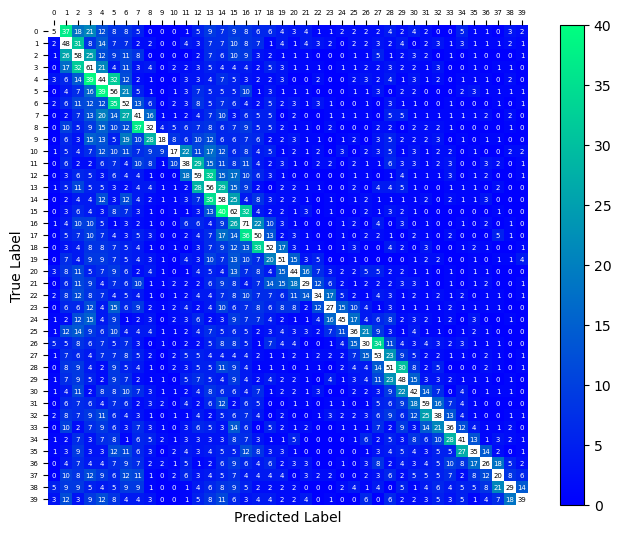

In [4]:
method_idx = 0
confusion_matrix_plot = confusion_matrix[method_idx, :, signal_len_idx, :, :]
confusion_matrix_plot = np.sum(confusion_matrix_plot, axis = 0)
confusion_matrix_plot = confusion_matrix_plot[sort_idx,:]
confusion_matrix_plot = confusion_matrix_plot[:,sort_idx]
N, _ = confusion_matrix_plot.shape
min_v = 0
max_v = np.amax(np.reshape(confusion_matrix_plot - np.diag(np.diag(confusion_matrix_plot)),(-1)))

import matplotlib.pyplot as plt
import matplotlib.patches as pach

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

im = ax.imshow(confusion_matrix_plot,
                interpolation = 'none',
                origin = 'upper',
                vmin = min_v,
                vmax = max_v,
                cmap='winter')

for n in range(N):
    ax.add_patch(
        pach.Rectangle(xy=(n-0.5, n-0.5), width=1, height=1, facecolor='white')
    )
for i in range(N):
    for j in range(N):
        if i==j:
            text_color = 'black'
        else:
            text_color = 'white'
        ax.text(i,j,"{:n}".format(int(confusion_matrix_plot[j,i])),
            fontsize=5,
            horizontalalignment='center',
            verticalalignment='center',
            color=text_color)
ax.figure.colorbar(im, ax=ax)
ax.set_xticks(list(range(N)))
ax.set_yticks(list(range(N)))
ax.spines[:].set_visible(False)
ax.grid(which="minor", color="black", linestyle='-', linewidth=10)
ax.tick_params(top=True, bottom=False,
                labeltop=True, labelbottom=False)
ax.tick_params(which="minor", bottom=False, left=False)
ax.tick_params(axis='x',labelsize=5)
ax.tick_params(axis='y',labelsize=5)
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

Finally, we can save this figure.

In [6]:
save_path = 'res/confusion_matrix_sCCA(qr)_T{:n}.jpg'.format(tw_seq[signal_len_idx])
fig.savefig(save_path, 
            bbox_inches='tight', dpi=300)